<a href="https://colab.research.google.com/github/amalsaidi10/Churn-prediction/blob/main/churn_prediction_telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import pandas as pd 
from zipfile import ZipFile

In [255]:
from google.colab import drive

#Load data into pandas dataframe

In [256]:
#read zip file
zip= ZipFile("/content/drive/MyDrive/Churn_case_study.zip",'r')
zip.printdir()
zip.extractall()

File Name                                             Modified             Size
training.csv                                   2019-11-17 22:31:32      1345205
validation.csv                                 2019-11-17 22:31:32       427718
TELCO churn.pdf                                2019-12-04 14:28:44       131702


In [257]:
df_validation=pd.read_csv("validation.csv")
df_training=pd.read_csv("training.csv")

In [258]:
print(df_training.head(5))

  CUSTOMER_ID COLLEGE        DATA   INCOME  OVERCHARGE  LEFTOVER     HOUSE  \
0     C100000    zero  660.000000  19995.0           0         0  897338.0   
1     C100001     one  317.647059  31477.0         155        15  393396.0   
2     C100006    zero  208.695652  66742.0           0        13  937197.0   
3     C100008    zero  265.017668  40864.0         183         0  986430.0   
4     C100010     one  440.000000  43321.5         200         0  394622.0   

  LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
0        False      4          3    160.0            155   
1         True      0          1    100.0            245   
2        False      4          2    127.0            493   
3        False      3          3     86.0            390   
4         True      2          3     77.0            175   

   OVER_15MINS_CALLS_PER_MONTH  TIME_CLIENT  AVERAGE_CALL_DURATION  \
0                            1          1.2                     15   
1                           27

In [259]:
print(df_validation.head(5))

  CUSTOMER_ID COLLEGE        DATA   INCOME  OVERCHARGE  LEFTOVER     HOUSE  \
0     C100002     one   80.000000  45452.5          75        65  342741.0   
1     C100003    zero  536.842105  40703.5          90         0  215904.0   
2     C100004    zero  256.578947  35563.0          52         0  341828.0   
3     C100005    zero  466.666667  66072.5           0         8  257222.0   
4     C100007    zero  150.000000  21901.5           0         0  800811.0   

  LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
0         True      3          1    149.0            300   
1         True      1          1    176.0            384   
2         True      2          3    124.0            371   
3         True      3          1    279.0            324   
4        False      1          3    128.0            164   

   OVER_15MINS_CALLS_PER_MONTH  TIME_CLIENT  AVERAGE_CALL_DURATION  \
0                            3          2.2                      2   
1                            4

In [260]:
print(df_training.shape)

(11981, 19)


In [261]:
print(df_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CUSTOMER_ID                  11981 non-null  object 
 1   COLLEGE                      11981 non-null  object 
 2   DATA                         11981 non-null  float64
 3   INCOME                       11981 non-null  float64
 4   OVERCHARGE                   11981 non-null  int64  
 5   LEFTOVER                     11981 non-null  int64  
 6   HOUSE                        11346 non-null  float64
 7   LESSTHAN600k                 11346 non-null  object 
 8   CHILD                        11981 non-null  int64  
 9   JOB_CLASS                    11981 non-null  int64  
 10  REVENUE                      11981 non-null  float64
 11  HANDSET_PRICE                11981 non-null  int64  
 12  OVER_15MINS_CALLS_PER_MONTH  11981 non-null  int64  
 13  TIME_CLIENT     

In [262]:
print(df_training.describe())

               DATA         INCOME    OVERCHARGE      LEFTOVER          HOUSE  \
count  11981.000000   11981.000000  11981.000000  11981.000000   11346.000000   
mean     503.625376   47595.943703     80.185460     23.785577  506521.681650   
std      457.156513   22293.736749     84.587419     26.680037  256808.319571   
min        0.000000   10032.500000     -2.000000      0.000000  150015.000000   
25%      181.818182   29367.000000      0.000000      0.000000  268511.250000   
50%      360.995851   44992.500000     56.000000     15.000000  469775.500000   
75%      685.714286   65078.000000    171.000000     41.000000  722464.250000   
max     6600.000000  105355.500000    298.000000     89.000000  999996.000000   

              CHILD     JOB_CLASS       REVENUE  HANDSET_PRICE  \
count  11981.000000  11981.000000  11981.000000   11981.000000   
mean       2.070194      2.508639    155.541941     383.495868   
std        1.249974      1.120546     47.905580     210.601172   
min   

In [263]:
print(df_training.columns)

Index(['CUSTOMER_ID', 'COLLEGE', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER',
       'HOUSE', 'LESSTHAN600k', 'CHILD', 'JOB_CLASS', 'REVENUE',
       'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'TIME_CLIENT',
       'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED'],
      dtype='object')


In [264]:
print(df_training["CHURNED"])

0         STAY
1        LEAVE
2         STAY
3        LEAVE
4        LEAVE
         ...  
11976     STAY
11977    LEAVE
11978    LEAVE
11979     STAY
11980     STAY
Name: CHURNED, Length: 11981, dtype: object


AxesSubplot(0.125,0.125;0.775x0.755)


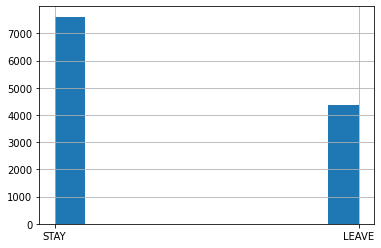

In [265]:
print(df_training["CHURNED"].hist())

In [266]:
df_training.isna().sum()

CUSTOMER_ID                      0
COLLEGE                          0
DATA                             0
INCOME                           0
OVERCHARGE                       0
LEFTOVER                         0
HOUSE                          635
LESSTHAN600k                   635
CHILD                            0
JOB_CLASS                        0
REVENUE                          0
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
TIME_CLIENT                      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION            0
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURNED                          0
dtype: int64

1/**imblanced data** , the majority of the label column take the value=**stay**

2/column="HOUSE" and column="LESSTHAN600K"  ,both of this columns contain missing value

In [267]:
print(df_training['HOUSE'])

0        897338.0
1        393396.0
2        937197.0
3        986430.0
4        394622.0
           ...   
11976    458723.0
11977    328171.0
11978    439967.0
11979    795808.0
11980    291220.0
Name: HOUSE, Length: 11981, dtype: float64


In [268]:
print(df_training['LESSTHAN600k'])

0        False
1         True
2        False
3        False
4         True
         ...  
11976     True
11977     True
11978     True
11979    False
11980     True
Name: LESSTHAN600k, Length: 11981, dtype: object


#clean the data

---
1/Missing value


In [269]:
def missing_value_continous(df):
  mean=df.mean()
  return df.fillna(value=mean,inplace=True)
def missing_value_categorical(df):
  mod=df.mode().iloc[0]
  return df.fillna(value=mod,inplace=True)

In [270]:
missing_value_continous(df_training["HOUSE"])
missing_value_categorical(df_training["LESSTHAN600k"])

In [271]:
df_training.isna().sum()

CUSTOMER_ID                    0
COLLEGE                        0
DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
LESSTHAN600k                   0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURNED                        0
dtype: int64

2/categorical features

getting the list of categorical column

In [272]:
df_training.select_dtypes(include=['object']).columns.tolist()

['CUSTOMER_ID',
 'COLLEGE',
 'REPORTED_SATISFACTION',
 'REPORTED_USAGE_LEVEL',
 'CONSIDERING_CHANGE_OF_PLAN',
 'CHURNED']

In [273]:
df_training["CHURNED"].unique()
#label encoding
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_training["CHURNED"]= label_encoder.fit_transform(df_training["CHURNED"])
  
df_training["CHURNED"]   #.unique()

0        1
1        0
2        1
3        0
4        0
        ..
11976    1
11977    0
11978    0
11979    1
11980    1
Name: CHURNED, Length: 11981, dtype: int64

In [274]:
df_training['COLLEGE'].unique()
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_training["COLLEGE"]= label_encoder.fit_transform(df_training["COLLEGE"])
  
df_training["COLLEGE"].unique()

array([1, 0])

In [275]:
df_training['REPORTED_SATISFACTION'].unique()
#len(df_training['REPORTED_SATISFACTION'].unique())
df_training["REPORTED_SATISFACTION"]= label_encoder.fit_transform(df_training["REPORTED_SATISFACTION"])
  
df_training["REPORTED_SATISFACTION"].unique()

array([4, 2, 0, 3, 1])

In [276]:

df_training['REPORTED_USAGE_LEVEL'].unique()
df_training["REPORTED_USAGE_LEVEL"]= label_encoder.fit_transform(df_training["REPORTED_USAGE_LEVEL"])
  
df_training["REPORTED_USAGE_LEVEL"].unique()

array([2, 4, 3, 1, 0])

In [277]:
df_training['CONSIDERING_CHANGE_OF_PLAN'].unique()
#len(df_training['CONSIDERING_CHANGE_OF_PLAN'].unique())
df_training["CONSIDERING_CHANGE_OF_PLAN"]= label_encoder.fit_transform(df_training["CONSIDERING_CHANGE_OF_PLAN"])
  
df_training["CONSIDERING_CHANGE_OF_PLAN"].unique()

array([1, 0, 2, 3, 4])

In [278]:

df_training["LESSTHAN600k"]= label_encoder.fit_transform(df_training["LESSTHAN600k"])

In [279]:
df_training.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,1,660.000000,19995.0,0,0,897338.0,0,4,3,160.0,155,1,1.2,15,4,2,1,1
1,C100001,0,317.647059,31477.0,155,15,393396.0,1,0,1,100.0,245,27,2.7,4,2,2,1,0
2,C100006,1,208.695652,66742.0,0,13,937197.0,0,4,2,127.0,493,20,2.6,4,0,4,1,1
3,C100008,1,265.017668,40864.0,183,0,986430.0,0,3,3,86.0,390,13,2.5,12,2,3,1,0
4,C100010,0,440.000000,43321.5,200,0,394622.0,1,2,3,77.0,175,18,2.4,10,4,2,0,0


Normalization

In [280]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
df_training.iloc[:,1:-1] = norm.fit_transform(df_training.iloc[:,1:-1])
df_training

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,0.000001,0.000735,0.022277,0.000000,0.000000,0.999752,0.000000,0.000004,0.000003,0.000178,0.000173,0.000001,0.000001,0.000017,0.000004,0.000002,0.000001,1
1,C100001,0.000000,0.000805,0.079759,0.000393,0.000038,0.996814,0.000003,0.000000,0.000003,0.000253,0.000621,0.000068,0.000007,0.000010,0.000005,0.000005,0.000003,0
2,C100006,0.000001,0.000222,0.071035,0.000000,0.000014,0.997474,0.000000,0.000004,0.000002,0.000135,0.000525,0.000021,0.000003,0.000004,0.000000,0.000004,0.000001,1
3,C100008,0.000001,0.000268,0.041391,0.000185,0.000000,0.999143,0.000000,0.000003,0.000003,0.000087,0.000395,0.000013,0.000003,0.000012,0.000002,0.000003,0.000001,0
4,C100010,0.000000,0.001108,0.109124,0.000504,0.000000,0.994027,0.000003,0.000005,0.000008,0.000194,0.000441,0.000045,0.000006,0.000025,0.000010,0.000005,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,C115967,0.000000,0.001802,0.088091,0.000089,0.000015,0.996111,0.000002,0.000000,0.000009,0.000278,0.000662,0.000011,0.000008,0.000009,0.000000,0.000004,0.000000,1
11977,C115968,0.000003,0.002149,0.222815,0.000208,0.000000,0.974856,0.000003,0.000009,0.000003,0.000591,0.001812,0.000015,0.000012,0.000039,0.000006,0.000006,0.000000,0
11978,C115970,0.000002,0.000179,0.173857,0.000000,0.000179,0.984769,0.000002,0.000007,0.000002,0.000210,0.001679,0.000002,0.000003,0.000002,0.000004,0.000004,0.000000,0
11979,C115972,0.000001,0.000098,0.047358,0.000000,0.000021,0.998878,0.000000,0.000004,0.000001,0.000178,0.000356,0.000000,0.000002,0.000010,0.000005,0.000003,0.000001,1


In [281]:
x=df_training.drop(['CHURNED','CUSTOMER_ID'],axis=1)
y=df_training['CHURNED']
print(x.shape)
print(y)

(11981, 17)
0        1
1        0
2        1
3        0
4        0
        ..
11976    1
11977    0
11978    0
11979    1
11980    1
Name: CHURNED, Length: 11981, dtype: int64


split the data

In [282]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [283]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9584, 17)
(2397, 17)
(9584,)
(2397,)


#model

as our data is imblanced, here I choose to work with XGbOOST

**train the XGBOOST model**

In [284]:
from xgboost import XGBClassifier

In [285]:
# fit model no training data
model_xgboost = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=13, 
                      gamma=10)
model_xgboost.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.4, gamma=10, learning_rate=0.01, max_depth=13,
              n_estimators=1000, reg_alpha=0.3, silent=False, subsample=0.8)

Make prediction with XGBOOST model

In [286]:
# make predictions for test data
y_pred = model_xgboost.predict(X_test)

In [287]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [288]:
y_pred_prob=model_xgboost.predict_proba(X_test)
print(y_pred_prob[:,0]) #probability of being in class 0 that's mean if they leave 

[0.22502977 0.26562738 0.385305   ... 0.09054118 0.37409866 0.24790514]


In [289]:
y_pred_prob=model_xgboost.predict_proba(X_test)
print(y_pred_prob)

[[0.22502977 0.77497023]
 [0.26562738 0.7343726 ]
 [0.385305   0.614695  ]
 ...
 [0.09054118 0.9094588 ]
 [0.37409866 0.62590134]
 [0.24790514 0.75209486]]


evaluate the model 

In [290]:
from sklearn.metrics import  roc_auc_score
y_val=model_xgboost.predict(X_train)
score_train=roc_auc_score(y_train,y_val)
score_test=roc_auc_score(y_test,y_pred)
print("the score train is equal to:{}".format(score_train))
print("the score test is equal to:{}".format(score_test))

the score train is equal to:0.7843645602778675
the score test is equal to:0.7040173572228443


**train logistic regression model**

In [291]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
result = model2.fit(X_train, y_train)
y_pred1 = model2.predict(X_test)
y_val=model2.predict(X_train)
from sklearn.metrics import  roc_auc_score
score_test=roc_auc_score(y_test,y_pred1)
score_train=roc_auc_score(y_train,y_val)
print("the score train is equal to:{}".format(score_train))
print("the score test is equal to:{}".format(score_test))

the score train is equal to:0.5286387977660266
the score test is equal to:0.5206117021276595


train random forest model

In [292]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=2000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

y_pred1 =model_rf.predict(X_test)
y_val=model_rf.predict(X_train)
from sklearn.metrics import  roc_auc_score
score_test=roc_auc_score(y_test,y_pred1)

print("the score train is equal to:{}".format(score_train))
print("the score test is equal to:{}".format(score_test))

the score train is equal to:0.5286387977660266
the score test is equal to:0.6200132978723405


# conclusion of the previous part

after training three differents algorithms spcific for the case of binary classsification which is the case here, we take note  that the best one is XGBOOST and this has been clear from the beginning because usually XGBOOST give the best result with imbalanced data

but when we look to the score of the training , we note that it is low(~52%) so this the an underfitting, we must resolve that in the second part

# part2: cleanning the test dataset

In [293]:
df_validation=pd.read_csv("validation.csv")

In [294]:
print(df_validation.head())
print(df_validation.shape)

  CUSTOMER_ID COLLEGE        DATA   INCOME  OVERCHARGE  LEFTOVER     HOUSE  \
0     C100002     one   80.000000  45452.5          75        65  342741.0   
1     C100003    zero  536.842105  40703.5          90         0  215904.0   
2     C100004    zero  256.578947  35563.0          52         0  341828.0   
3     C100005    zero  466.666667  66072.5           0         8  257222.0   
4     C100007    zero  150.000000  21901.5           0         0  800811.0   

  LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
0         True      3          1    149.0            300   
1         True      1          1    176.0            384   
2         True      2          3    124.0            371   
3         True      3          1    279.0            324   
4        False      1          3    128.0            164   

   OVER_15MINS_CALLS_PER_MONTH  TIME_CLIENT  AVERAGE_CALL_DURATION  \
0                            3          2.2                      2   
1                            4

In [295]:
missing_value_continous(df_validation["HOUSE"])
missing_value_categorical(df_validation["LESSTHAN600k"])

In [296]:
df_validation.isna().sum()

CUSTOMER_ID                    0
COLLEGE                        0
DATA                           0
INCOME                         0
OVERCHARGE                     0
LEFTOVER                       0
HOUSE                          0
LESSTHAN600k                   0
CHILD                          0
JOB_CLASS                      0
REVENUE                        0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
TIME_CLIENT                    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
dtype: int64

In [297]:
df_validation["COLLEGE"]= label_encoder.fit_transform(df_validation["COLLEGE"])
df_validation["REPORTED_SATISFACTION"]= label_encoder.fit_transform(df_validation["REPORTED_SATISFACTION"])
df_validation["REPORTED_USAGE_LEVEL"]= label_encoder.fit_transform(df_validation["REPORTED_USAGE_LEVEL"])
df_validation["CONSIDERING_CHANGE_OF_PLAN"]= label_encoder.fit_transform(df_validation["CONSIDERING_CHANGE_OF_PLAN"])
df_validation["LESSTHAN600k"]= label_encoder.fit_transform(df_validation["LESSTHAN600k"])

In [298]:
X_test1=df_validation.drop(["CUSTOMER_ID"],axis=1)

In [299]:
print(X_test1.head(12))

    COLLEGE         DATA   INCOME  OVERCHARGE  LEFTOVER     HOUSE  \
0         0    80.000000  45452.5          75        65  342741.0   
1         1   536.842105  40703.5          90         0  215904.0   
2         1   256.578947  35563.0          52         0  341828.0   
3         1   466.666667  66072.5           0         8  257222.0   
4         1   150.000000  21901.5           0         0  800811.0   
5         1   540.000000  14447.5           0         0  715285.0   
6         0   219.230769  11289.0           0        16  215378.0   
7         0   105.263158  34274.0         233        18  288131.0   
8         0   630.000000  12003.5           0         0  227976.0   
9         1   132.075472  30533.5          37        34  310740.0   
10        0  1000.000000  48029.0          77        12  513048.0   
11        0   176.308540  63669.0         229        76  863186.0   

    LESSTHAN600k  CHILD  JOB_CLASS  REVENUE  HANDSET_PRICE  \
0              1      3          1    14

In [300]:
X_test1.shape

(3993, 17)

In [301]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_test1.iloc[:,1:-1] = norm.fit_transform(X_test1.iloc[:,1:-1])
X_test1

,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,0,0.000231,0.131464,0.000217,0.000188,0.991320,0.000003,0.000009,0.000003,0.000431,0.000868,0.000009,0.000006,0.000006,0.000006,0.000006,1
1,1,0.002443,0.185261,0.000410,0.000000,0.982684,0.000005,0.000005,0.000005,0.000801,0.001748,0.000018,0.000011,0.000059,0.000009,0.000014,0
2,1,0.000747,0.103479,0.000151,0.000000,0.994631,0.000003,0.000006,0.000009,0.000361,0.001080,0.000015,0.000007,0.000035,0.000009,0.000000,1
3,1,0.001757,0.248792,0.000000,0.000030,0.968554,0.000004,0.000011,0.000004,0.001051,0.001220,0.000004,0.000011,0.000019,0.000011,0.000015,0
4,1,0.000187,0.027339,0.000000,0.000000,0.999626,0.000000,0.000001,0.000004,0.000160,0.000205,0.000001,0.000002,0.000015,0.000000,0.000004,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,0,0.001165,0.064030,0.000000,0.000000,0.997947,0.000000,0.000005,0.000001,0.000204,0.000564,0.000000,0.000003,0.000011,0.000000,0.000004,2
3989,1,0.001247,0.134730,0.000517,0.000016,0.990881,0.000002,0.000005,0.000005,0.000491,0.000450,0.000039,0.000012,0.000009,0.000002,0.000005,1
3990,1,0.000167,0.061930,0.000383,0.000093,0.998080,0.000000,0.000007,0.000002,0.000187,0.000228,0.000020,0.000003,0.000002,0.000005,0.000002,1
3991,0,0.001458,0.075575,0.000085,0.000000,0.997138,0.000000,0.000002,0.000002,0.000177,0.001068,0.000004,0.000008,0.000015,0.000005,0.000002,1


In [302]:
df_validation ['CUSTOMER_ID']

0       C100002
1       C100003
2       C100004
3       C100005
4       C100007
         ...   
3988    C115959
3989    C115961
3990    C115962
3991    C115969
3992    C115971
Name: CUSTOMER_ID, Length: 3993, dtype: object

In [303]:
test_label=model_xgboost.predict(X_test1)
print(test_label)
print(test_label.shape)

[1 0 1 ... 1 1 1]
(3993,)


In [304]:
test_label_proba=model_xgboost.predict_proba(X_test1)
print(test_label_proba)


[[0.4081586  0.5918414 ]
 [0.53258586 0.4674141 ]
 [0.31247866 0.68752134]
 ...
 [0.19864768 0.8013523 ]
 [0.3083316  0.6916684 ]
 [0.07606226 0.92393774]]


In [310]:
prob_of_leave=test_label_proba[:,0]
print(prob_of_leave)

[0.4081586  0.53258586 0.31247866 ... 0.19864768 0.3083316  0.07606226]


In [305]:
""" insering new column in an existing dataframe"""
#df.insert(1, "patient_name", columntoadd)

' insering new column in an existing dataframe'

In [ ]:

#the result is a concatination between the column customer_id of the df_validation ,X_test1 and the test_label
# result is the complet dataset of the test after adding the missing label 
X_test1.insert(0,'CUSTOMER_ID',df_validation['CUSTOMER_ID'])
X_test1.insert(18,'CHURNED',test_label)

In [312]:
X_test1.insert(18,'CHURNED',test_label)

In [314]:
X_test1.insert(19,'CHURN_PROBABILITY',prob_of_leave)

In [315]:
X_test1.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,CHURN_PROBABILITY
0,C100002,0,0.000231,0.131464,0.000217,0.000188,0.991320,0.000003,0.000009,0.000003,0.000431,0.000868,0.000009,0.000006,0.000006,0.000006,0.000006,1,1,0.408159
1,C100003,1,0.002443,0.185261,0.000410,0.000000,0.982684,0.000005,0.000005,0.000005,0.000801,0.001748,0.000018,0.000011,0.000059,0.000009,0.000014,0,0,0.532586
2,C100004,1,0.000747,0.103479,0.000151,0.000000,0.994631,0.000003,0.000006,0.000009,0.000361,0.001080,0.000015,0.000007,0.000035,0.000009,0.000000,1,1,0.312479
3,C100005,1,0.001757,0.248792,0.000000,0.000030,0.968554,0.000004,0.000011,0.000004,0.001051,0.001220,0.000004,0.000011,0.000019,0.000011,0.000015,0,1,0.112478
4,C100007,1,0.000187,0.027339,0.000000,0.000000,0.999626,0.000000,0.000001,0.000004,0.000160,0.000205,0.000001,0.000002,0.000015,0.000000,0.000004,4,1,0.057843


In [316]:
result=X_test1

In [317]:
result.head(5)

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED,CHURN_PROBABILITY
0,C100002,0,0.000231,0.131464,0.000217,0.000188,0.991320,0.000003,0.000009,0.000003,0.000431,0.000868,0.000009,0.000006,0.000006,0.000006,0.000006,1,1,0.408159
1,C100003,1,0.002443,0.185261,0.000410,0.000000,0.982684,0.000005,0.000005,0.000005,0.000801,0.001748,0.000018,0.000011,0.000059,0.000009,0.000014,0,0,0.532586
2,C100004,1,0.000747,0.103479,0.000151,0.000000,0.994631,0.000003,0.000006,0.000009,0.000361,0.001080,0.000015,0.000007,0.000035,0.000009,0.000000,1,1,0.312479
3,C100005,1,0.001757,0.248792,0.000000,0.000030,0.968554,0.000004,0.000011,0.000004,0.001051,0.001220,0.000004,0.000011,0.000019,0.000011,0.000015,0,1,0.112478
4,C100007,1,0.000187,0.027339,0.000000,0.000000,0.999626,0.000000,0.000001,0.000004,0.000160,0.000205,0.000001,0.000002,0.000015,0.000000,0.000004,4,1,0.057843


In [318]:
result.shape

(3993, 20)

In [319]:
result.to_csv('first_result.csv')